In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [3]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
# Load the data
housing_df = pd.read_csv('clean_housing_data.csv') 
housing_df.head()

,Unnamed: 0,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options
0,0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport
1,1,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage
2,2,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport
3,3,reno / tahoe,935,apartment,661,1,1.0,1,1,1,0,0,0,laundry on site,off-street parking
4,4,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport


In [5]:
# Drop first column of dataframe
housing_df = housing_df .iloc[: , 1:]
housing_df.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport
1,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage
2,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport
3,reno / tahoe,935,apartment,661,1,1.0,1,1,1,0,0,0,laundry on site,off-street parking
4,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport


In [6]:
housing_df.columns

Index(['region', 'price', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options'],
      dtype='object')

In [7]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212188 entries, 0 to 212187
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region                   212188 non-null  object 
 1   price                    212188 non-null  int64  
 2   type                     212188 non-null  object 
 3   sqfeet                   212188 non-null  int64  
 4   beds                     212188 non-null  int64  
 5   baths                    212188 non-null  float64
 6   cats_allowed             212188 non-null  int64  
 7   dogs_allowed             212188 non-null  int64  
 8   smoking_allowed          212188 non-null  int64  
 9   wheelchair_access        212188 non-null  int64  
 10  electric_vehicle_charge  212188 non-null  int64  
 11  comes_furnished          212188 non-null  int64  
 12  laundry_options          212188 non-null  object 
 13  parking_options          212188 non-null  object 
dtypes: f

In [8]:
df_dummies = pd.get_dummies(data=housing_df, columns=['region','type','laundry_options','parking_options'])
df_dummies.head()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,...,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit,parking_options_attached garage,parking_options_carport,parking_options_detached garage,parking_options_no parking,parking_options_off-street parking,parking_options_street parking,parking_options_valet parking
0,1148,1078,3,2.0,1,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,1813,1683,2,2.0,1,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,1095,708,1,1.0,1,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,935,661,1,1.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1095,708,1,1.0,1,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [9]:
#new_housing_df = housing_df.merge(df_dummies,left_index=True,right_index=True)
housing_df = pd.concat([housing_df, df_dummies], axis=1).drop(['region','type','laundry_options','parking_options'], axis=1)
housing_df.head()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,...,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit,parking_options_attached garage,parking_options_carport,parking_options_detached garage,parking_options_no parking,parking_options_off-street parking,parking_options_street parking,parking_options_valet parking
0,1148,1078,3,2.0,1,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,1813,1683,2,2.0,1,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,1095,708,1,1.0,1,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,935,661,1,1.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1095,708,1,1.0,1,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [10]:
housing_df.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,...,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit,parking_options_attached garage,parking_options_carport,parking_options_detached garage,parking_options_no parking,parking_options_off-street parking,parking_options_street parking,parking_options_valet parking
count,212188.000000,212188.000000,212188.000000,212188.000000,212188.000000,212188.000000,212188.000000,212188.000000,212188.000000,212188.000000,...,212188.000000,212188.000000,212188.00000,212188.000000,212188.000000,212188.000000,212188.000000,212188.000000,212188.000000,212188.000000
mean,1222.172116,984.290167,1.878344,1.465905,0.809061,0.778970,0.653892,0.105180,0.017725,0.045441,...,0.011495,0.223523,0.43798,0.158477,0.168662,0.071616,0.008158,0.527584,0.064919,0.000584
std,572.012680,338.140255,0.836628,0.553398,0.393042,0.414942,0.475729,0.306786,0.131950,0.208269,...,0.106595,0.416607,0.49614,0.365189,0.374454,0.257851,0.089952,0.499240,0.246383,0.024167
min,500.000000,250.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,830.000000,750.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1070.000000,944.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1459.000000,1137.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,6000.000000,2500.000000,8.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='sqfeet', ylabel='price'>

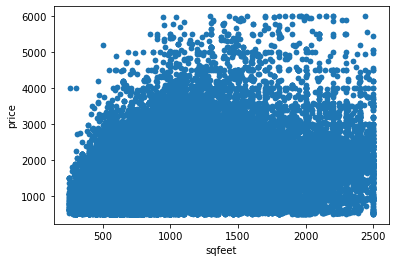

In [11]:
housing_df.plot.scatter(x='sqfeet',y='price')

<AxesSubplot:xlabel='beds', ylabel='price'>

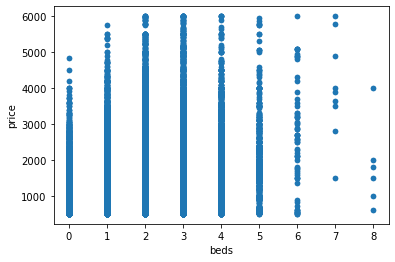

In [12]:
housing_df.plot.scatter(x='beds',y='price')

In [13]:
# Create our features
X= housing_df.drop(columns="price")

# Create our target
y = housing_df['price']

In [14]:
# split data into train and test
# the test set will be 20% of the whole data set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

In [15]:
# instantiate, fit
# Train the model
linreg=linear_model.LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [16]:
#print linear regression intercept
linreg.intercept_

array([491.34219058, 491.34219058])

In [17]:
#print linear regression coef 
linreg.coef_mnxcvjkdjkjckls

array([[ 2.59230904e-01,  5.51082095e+00,  3.17668407e+01,
        -9.46721849e+00,  2.39691795e+01, -3.51715205e+01,
         5.54241340e+00,  5.49185305e+01,  3.78181670e+01,
         2.59230904e-01,  5.51082095e+00,  3.17668407e+01,
        -9.46721849e+00,  2.39691795e+01, -3.51715205e+01,
         5.54241340e+00,  5.49185305e+01,  3.78181670e+01,
         1.70890218e+03, -1.71053553e+02, -2.16700014e+02,
        -8.56954831e+01, -1.18293910e+02, -2.57297362e+02,
        -2.24398324e+02, -1.74459253e+02,  8.40959512e+01,
         2.22249966e+02,  4.53704248e+02, -3.47468106e+02,
         1.05413406e+02, -2.61318959e+02, -7.80180827e+01,
         1.15747515e+02, -2.54060273e+02, -1.28468100e+02,
         3.55761424e+02,  3.05760328e+01,  2.40349106e+02,
        -1.62917429e+02, -1.37334585e+02,  4.02493779e-01,
         3.23015203e+02, -1.28602377e+02,  2.70381630e+02,
        -2.77901272e+02, -1.96812842e+02, -1.21779258e+02,
        -2.77831841e+02, -1.29987506e+02, -3.04369875e+0

In [18]:
#generate predictions
y_pred = linreg.predict(X_test)
y_pred

array([[1132.48829947, 1132.48829947],
       [1344.51079076, 1344.51079076],
       [ 559.86904259,  559.86904259],
       ...,
       [2111.26733026, 2111.26733026],
       [ 628.45220932,  628.45220932],
       [ 749.59243839,  749.59243839]])

In [19]:
# Evaluate the model
#comparer prediction with actual values
y_pred[0]

array([1132.48829947, 1132.48829947])

In [20]:
y_pred[1]

array([1344.51079076, 1344.51079076])

In [21]:
#actual values
y_test

,price,price
173767,1033,1033
13122,1358,1358
91056,599,599
78141,930,930
207478,1125,1125
...,...,...
37819,1085,1085
100398,1004,1004
23056,2000,2000
16245,680,680


In [22]:
# mean square error
np.mean(y_pred-y_test)

price    3.281511
price    3.281511
dtype: float64

In [23]:
#RMSE
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

304.9779756012785


In [24]:
#MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

190.3544690186308


In [25]:
#MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred, squared=False))

304.9779756012785


In [26]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.7132132856856013
